# Fair Classification in US Census Data

## Problem statement

The US Census Bureau has published data on various social and economic factors for individuals living in the United States. This dataset includes demographic information such as age, education level, and work class, as well as sensitive attributes like race and sex. The goal of this case study is to explore the dataset, understand the relationships between different features and the target variable, and evaluate the fairness of the dataset with respect to the protected attributes. Specifically, we will investigate the fairness in terms of race (White, Black) and sex (Male, Female).

The goal of this case study is to predict whether an individual earns more than $50,000 per year based on the features in the dataset. We will evaluate the fairness of the model predictions using the demographic parity and equal opportunity metrics and apply bias mitigation techniques to improve the fairness of the model. Finally, we compare the performance and fairness of the original and bias-mitigated models to understand the trade-offs between accuracy and fairness in this context.

## Exploratory data analysis

In this case study, we will begin with an exploratory data analysis of the US Census dataset. Our goal is to understand the distributions of various features, investigate their relationships with the target variable (whether an individual earns more than $50,000 per year), and assess the fairness of the dataset concerning protected attributes.

The `load_dataset` function is responsible for loading the dataset and returning the features and the target variable. The dataset comprises 45,222 samples and 82 features. The dataset allows us to explore two types of protected attributes: race and sex.

- **Race**: when the protected attribute is set to race, Group A consists of individuals identified as White, and Group B consists of individuals identified as Black.

- **Sex**: When the protected attribute is set to sex, Group A comprises Male individuals, and Group B comprises Female individuals.

The target variable indicates whether an individual's annual income exceeds $50,000. Specifically:

- A value of **1** indicates that the individual earns more than $50,000 per year.

- A value of **0** indicates that the individual earns at most $50,000 per year.

In [1]:
from holisticai.datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset('adult', protected_attribute='sex')
dataset

In [2]:
ds = dataset.train_test_split(test_size=0.2)
ds

DatasetDict({
    train: <holisticai.datasets._dataset.Dataset object at 0x7fa30c3d0910>,
    test: <holisticai.datasets._dataset.Dataset object at 0x7fa30c14d350>
})

In [3]:
# Get table of data
dataset['X']

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,89814.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,336951.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,160323.0,7688.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34.0,198693.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27.0,257302.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,40.0,154374.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,58.0,151910.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,22.0,201490.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Evaluating unbalanced classes

To understand the distribution of the sensitive attribute, we will plot the proportion of different groups in the dataset. Considering sex as the protected attribute, we can observe the breakdown of individuals in the dataset. Specifically, the proportion of each groups will help us understand the representation and potential biases in the dataset.

In this analysis, we note that 32% of the individuals in the dataset are Female, while 68% are Male. This disparity in representation is crucial as it can affect the fairness and accuracy of any predictive models built using this data. By visualizing these proportions, we gain a clearer picture of the demographic composition of the dataset and can better identify any imbalances that may need to be addressed.

<Axes: >

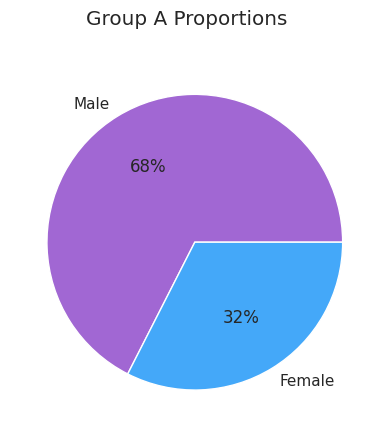

In [4]:
from holisticai.bias.plots import group_pie_plot

# Plot the distribution of the sensitive attribute
group = dataset['group_a'].replace({True:'Male', False:'Female'})
group_pie_plot(group, title = 'Group A Proportions')

### Relationship between features and target variable

In this section, we will investigate the relationship between various features and the target variable (income level). Specifically, we will explore how different features are correlated with the target variable and identify any patterns or trends that may be present in the data.

We will use a correlation matrix to visualize the relationships between different features and the target variable. This matrix will help us identify which features are most strongly correlated with the target variable and provide insights into which features are most predictive of an individual's income level. Using the `correlation_matrix_plot` function, we can define the top-k features that are most correlated with the target variable. Foi simplicity, we will consider the top-10 features.


In [5]:
dataset

<Axes: title={'center': 'Correlation matrix'}>

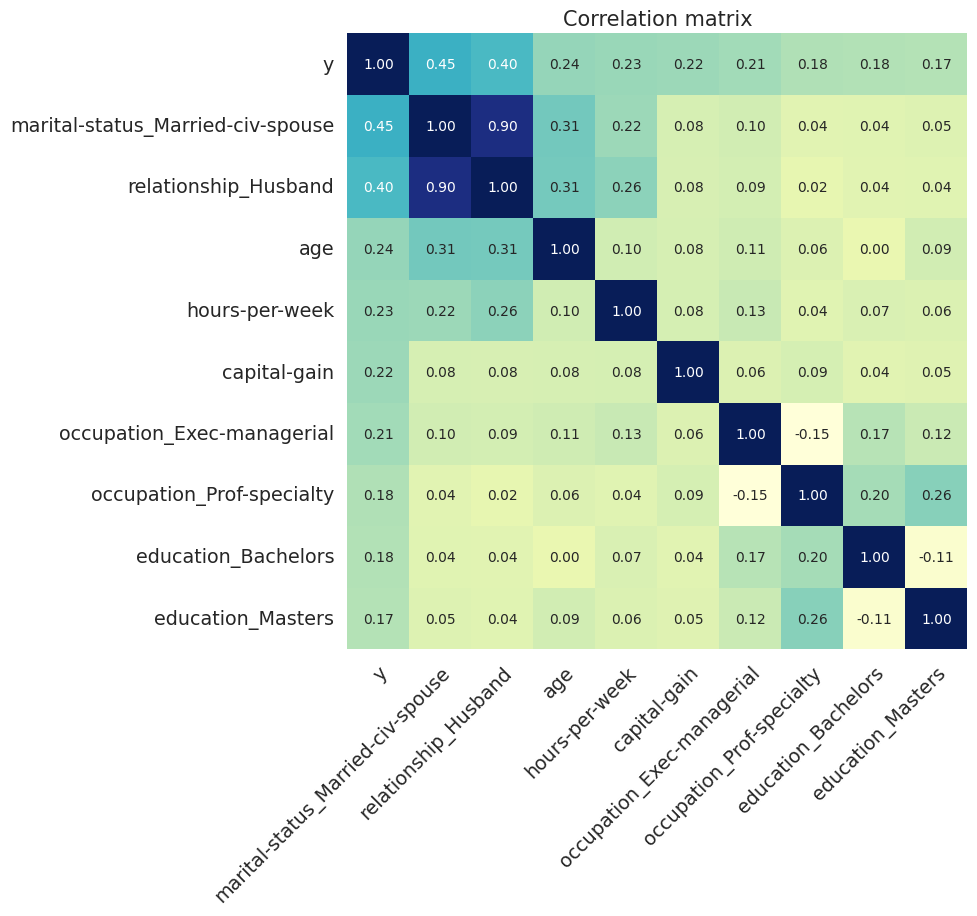

In [6]:
from holisticai.datasets.plots import correlation_matrix_plot

correlation_matrix_plot(dataset, features = ['X'], target_feature='y',  size=(8, 8), n_features=10)

We observe that marital status is the most strongly correlated feature with the target variable, followed by relationship and education level. Some a priori assumption could be made about the relationship between these features and income level. For example, it is reasonable to assume that individuals who are married or in a relationship may have higher incomes due to shared living expenses and dual incomes. Similarly, individuals with higher education levels may have higher-paying jobs and, therefore, higher incomes.

Age is also strongly correlated with the target variable, which is consistent with the common belief that older individuals tend to have higher incomes due to more work experience and career advancement. Finally, hours per week worked is another important feature that is positively correlated with income level, as individuals who work more hours per week are likely to earn higher incomes.

But capital gain and capital loss are also in the top-10 features. These features are related to financial investments and can provide additional insights into an individual's income level. For example, individuals with higher capital gains may have additional sources of income, such as investments or real estate, that contribute to their overall income level. Similarly, individuals with capital losses may have incurred financial losses that impact their income level.

Next, we will explore the relationship between the protected attributes and the target variable to understand if there are any disparities in correlation between different groups and the target variable.

<Axes: title={'center': 'Correlation matrix'}>

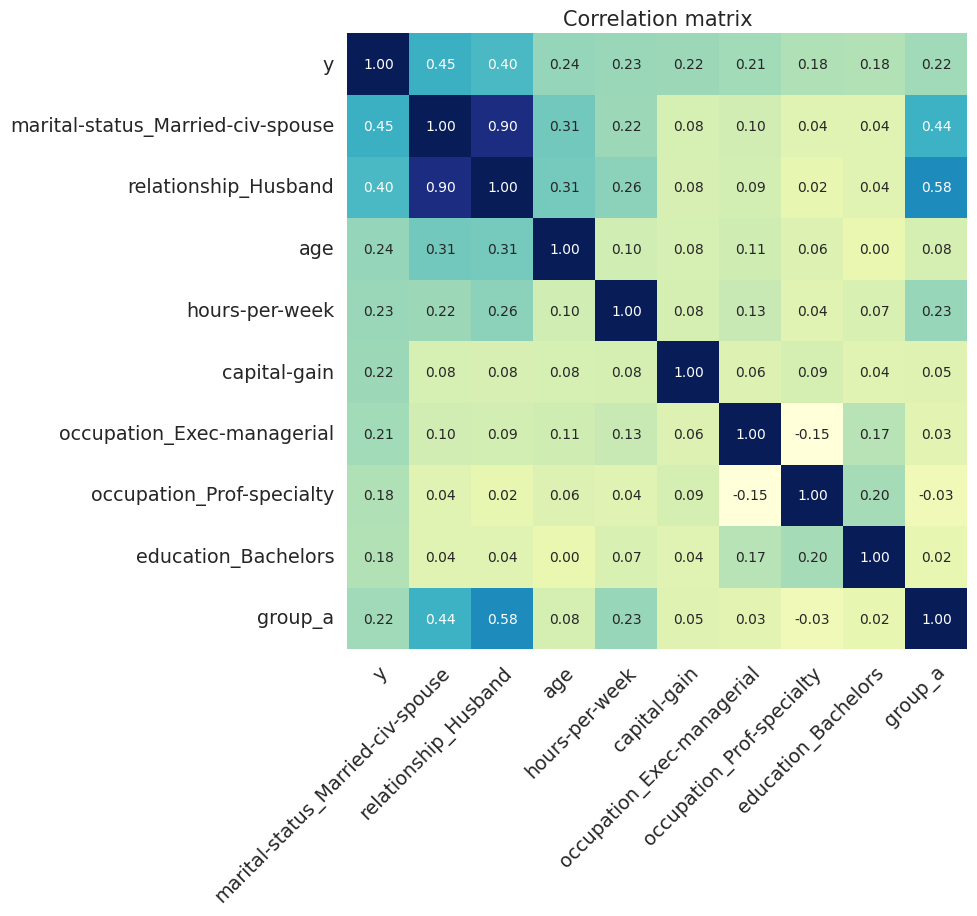

In [7]:
from holisticai.datasets.plots import correlation_matrix_plot

correlation_matrix_plot(dataset, features = ['X'], fixed_features=['group_a'], target_feature='y',  size=(8, 8), n_features=10)

Considering the group A as Male, we can observe that the top-10 are the same as the general top-10 features. So, we can expect that predictions for this group and the general population will be similar.

Next, we will consider the correlations between the features by group B and the target variable.

<Axes: title={'center': 'Correlation matrix'}>

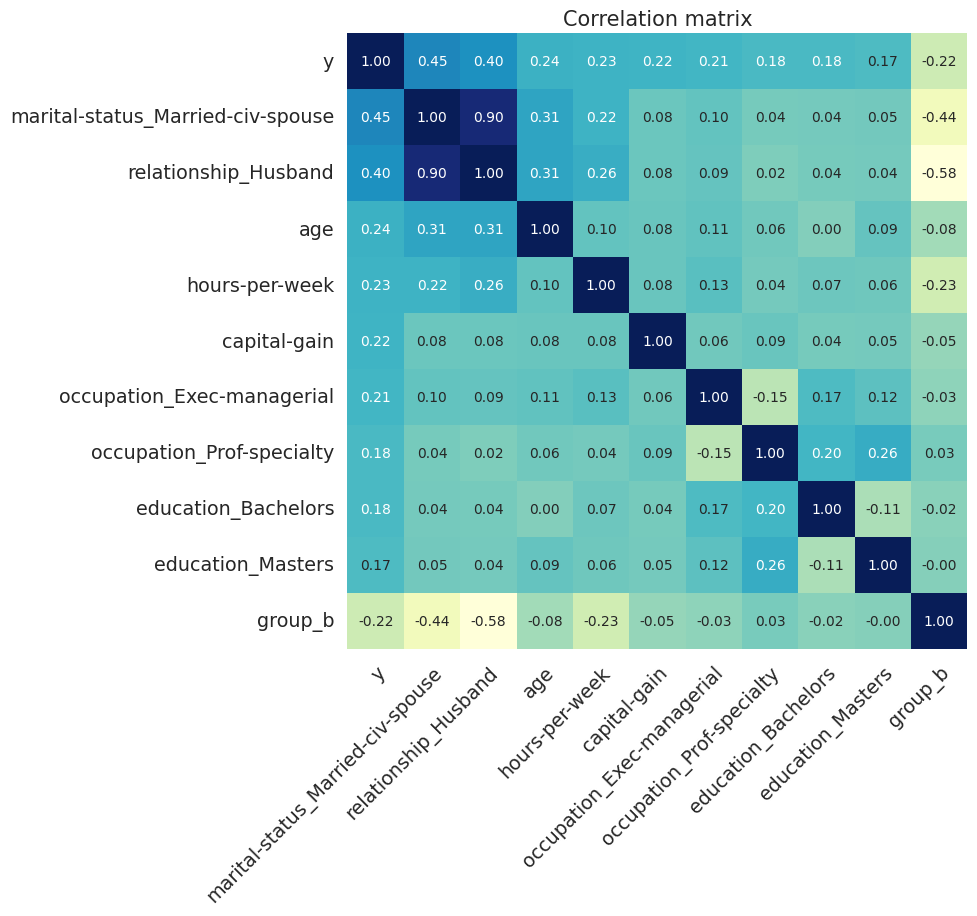

In [8]:
from holisticai.datasets.plots import correlation_matrix_plot

correlation_matrix_plot(dataset, features = ['X'], fixed_features=['group_b'], target_feature='y',  size=(8, 8), n_features=10)

Consider group B (Female) we observe that be married is the most correlated feature with the target variable. This correlation is more strong than the general population. We can generalize that married status have more weight in the prediction for this group if we consider that some models look for this strong relationships and patterns to make predictions.

## Fairness evaluation

We observe that there are disparities in the correlation between features and the target variable across different groups. These disparities can result in biased predictions and unfair outcomes for individuals within the dataset. To evaluate and address the fairness of the classification predictions, we will follow a structured pipeline with the following steps:

**Measure Bias in Predictions**: We will train machine learning models and employ a set of bias metrics to assess whether the predictions are biased with respect to the protected attributes.

**Bias Mitigation**: If bias is detected in the predictions, we will apply bias mitigation techniques to enhance the fairness of the model.

**Comparison**: Finally, we will compare the performance and fairness of the original and bias-mitigated models. This comparison will help us understand the trade-offs between accuracy and fairness in this context.

By following these steps, we aim to ensure that our predictive models are both accurate and fair, minimizing any potential biases related to protected attributes.

### Set up the dataset and protected attributes

The experiment consider _sex_ as the protected attribute. But the experiment can be easily replicated by changing the protected attribute for _race_.

Holisticai library that are available several preprocessing, inprocessing, and postprocessing bias mitigation strategies . For this study case, we applied: Correlation Remover (preprocessing), Prejudice Remover (inprocessing), and Machine Learning Debiasing (postprocessing). We use `Pipeline` class to combine the bias mitigation strategy with the classification model in a more straightforward way.

In [9]:
# some imports
from holisticai.bias.metrics import classification_bias_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from holisticai.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.mitigation import Reweighing


In [10]:
# load the dataset with sex attribute as the protected attribute
dataset = load_dataset('adult', protected_attribute='sex')
train_test = dataset.train_test_split(test_size=0.2, random_state=42)

# get the train and test data
train = train_test['train']
test = train_test['test']

# check the number of samples in each group
print('Train data shape:', train['X'].shape)
print('Test data shape:', test['X'].shape)

Train data shape: (36177, 97)
Test data shape: (9045, 97)


### Measure bias in predictions (without bias mitigation)

In this step, we will train machine learning models to predict whether an individual earns more than $50,000 per year based on the features in the dataset. We use a Random Forest Classifier model for this task. The bias metrics used are based both in equality of opportunity and equality of outcomes.


In [11]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Standardize data and fit model
scaler = StandardScaler()
X_train = scaler.fit_transform(train['X'])
model.fit(X_train, train['y'])

# Predict on test data
X_test = scaler.transform(test['X'])
y_pred = model.predict(X_test)

# Evaluate bias metrics
baseline = classification_bias_metrics(test['group_a'], test['group_b'], y_pred, test['y'], metric_type='both')

# Compute accuracy
baseline_accuracy = accuracy_score(test['y'], y_pred)

### Bias Mitigation

#### Pre-processing

For pre-processing, we will use the Correlation Remover algorithm to remove correlations between the sensitive attribute and the features. CorrelationRemover applies a linear transformation to the non-sensitive feature columns in order to remove their correlation with the sensitive feature columns while retaining as much information as possible (as measured by the least-squares error).

In [12]:
# Define preprocessing model
mitigator = Reweighing()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(train['X'], train['y'], bm__group_a=train['group_a'], bm__group_b=train['group_b'])

# Make predictions
y_pred_pipeline = pipeline.predict(test['X'], bm__group_a=test['group_a'], bm__group_b=test['group_b'])

# Evaluate bias metrics for pipeline model
metrics_preprocessing = classification_bias_metrics(test['group_a'], test['group_b'], y_pred_pipeline, test['y'], metric_type='both')

# Compute accuracy for preprocessing model
accuracy_preprocessing = accuracy_score(test['y'], y_pred_pipeline)

#### In-processing

 For in-processing, we will use the Prejudice Remover algorithm to reduce bias in the predictions. Prejudice remover is an in-processing technique that adds a discrimination-aware regularization term to the learning objective function.

In [13]:
import warnings
warnings.filterwarnings('ignore')

mitigator = PrejudiceRemover(maxiter=100, fit_intercept=True, verbose=1, print_interval=1).transform_estimator(model)

# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ('bm_inprocessing', mitigator)])
pipeline.fit(train['X'], train['y'], bm__group_a=train['group_a'], bm__group_b=train['group_b'])

# Make predictions
y_pred_pipeline = pipeline.predict(test['X'], bm__group_a=test['group_a'], bm__group_b=test['group_b'])

# Evaluate bias metrics for pipeline model
metrics_inprocessing = classification_bias_metrics(test['group_a'], test['group_b'], y_pred_pipeline, test['y'], metric_type='both')

# Compute accuracy for inprocessing model
accuracy_inprocessing = accuracy_score(test['y'], y_pred_pipeline)


[elapsed time: 00:00:06 | Best Loss : 13018.0391]


#### Post-processing

For post-processing, we will use the Machine Learning Debiasing algorithm to mitigate bias in the predictions. MLDebiaser postprocessing debias predictions with reference to the sensitive class in each demographic group. This procedure takes as input a vector y and solves the optimization problem subject to the statistical parity constraint. This bias mitigation can be used for classification (binary and multiclass).

In [14]:
from holisticai.pipeline import Pipeline
from holisticai.bias.mitigation import MLDebiaser

# Define postprocessing model
mitigator = MLDebiaser()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("estimator", model), ("bm_posprocessing", mitigator)])
pipeline.fit(train['X'], train['y'], bm__group_a=train['group_a'], bm__group_b=train['group_b'])

# Make predictions
y_pred_pipeline = pipeline.predict(test['X'], bm__group_a=test['group_a'], bm__group_b=test['group_b'])

# Evaluate bias metrics for pipeline model
metrics_postprocessing = classification_bias_metrics(test['group_a'], test['group_b'], y_pred_pipeline, test['y'], metric_type='both')

# Compute accuracy for postprocessing model
accuracy_postprocessing = accuracy_score(test['y'], y_pred_pipeline)

[elapsed time: 00:00:00 | iter:2/2]


### Comparison of bias metrics and accuracy

In [15]:
# Comparison table of bias metrics

keys = ['Baseline', 'Preprocessing Mitigator', 'Inprocessing Mitigator', 'Postprocessing Mitigator', 'Reference'] 
comparison = pd.concat([baseline['Value'], metrics_preprocessing['Value'], metrics_inprocessing['Value'], metrics_postprocessing], axis=1)
comparison.columns = keys

def highlight_closest(s):
    reference = s['Reference']
    differences = s.drop('Reference').apply(lambda x: abs(x - reference))
    closest = differences.idxmin()
    return ['background-color: mediumseagreen' if x == s[closest] else '' for x in s]

comparison_highlighted = comparison.style.apply(highlight_closest, axis=1)
comparison_highlighted

,Baseline,Preprocessing Mitigator,Inprocessing Mitigator,Postprocessing Mitigator,Reference
Metric,,,,,
Statistical Parity,0.173873,0.177722,0.123365,0.065855,0
Disparate Impact,2.954733,3.045207,2.226515,1.388095,1
Four Fifths Rule,0.338440,0.328385,0.449132,0.720412,1
Cohen D,0.438358,0.448023,0.321904,0.160955,0
2SD Rule,19.100792,19.504410,14.158636,7.138974,0
Equality of Opportunity Difference,0.072457,0.093067,-0.001545,-0.161857,0
False Positive Rate Difference,0.072322,0.076573,0.036702,-0.012968,0
Average Odds Difference,0.072390,0.084820,0.017578,-0.087413,0
Accuracy Difference,-0.107176,-0.108788,-0.103027,-0.070983,0


In [16]:
# Create a comparison table of accuracy

acc = {
    'Baseline': baseline_accuracy,
    'Preprocessing Mitigator': accuracy_preprocessing,
    'Inprocessing Mitigator': accuracy_inprocessing,
    'Postprocessing Mitigator': accuracy_postprocessing
}

acc_data = pd.DataFrame(acc, index=['Accuracy'])
acc_data.loc['Accuracy'] = acc_data.loc['Accuracy'].apply(lambda x: round(x, 4))
acc_data.loc['Diff. Baseline (%)'] = acc_data.loc['Accuracy'].apply(lambda x: round((x - acc_data.loc['Accuracy']['Baseline']) * 100, 4))
acc_data

,Baseline,Preprocessing Mitigator,Inprocessing Mitigator,Postprocessing Mitigator
Accuracy,0.8519,0.8467,0.8423,0.838
Diff. Baseline (%),0.0000,-0.5200,-0.9600,-1.390


The final comparison table show that the bias mitigation strategies have improved the fairness of the model predictions. The fairness metrics for the bias-mitigated models are significantly closer to the reference value of each metric, indicating that the bias mitigation techniques have successfully reduced bias in the predictions. And we can see that the accuracy of the bias-mitigated models is slightly lower than the original model, but the trade-off between accuracy and fairness is acceptable in this context.

## Summary


This case study examined the fairness of machine learning classification models on US Census data, aiming to predict whether individuals earn more than $50,000 per year based on demographic and socio-economic features. Our analysis highlighted biases related to sex, with initial models showing disparities in income predictions. Through the application of three bias mitigation techniques (Correlation Remove, Prejudice Remover, and MLDebiaser), we were able to improve bias metrics. However, these improvements often came with slight reductions in overall model accuracy, demonstrating the trade-off between bias and accuracy.

The findings emphasize the necessity of addressing fairness in machine learning models, particularly in applications with social implications. While it is feasible to enhance fairness without greatly compromising accuracy, practitioners must carefully consider these trade-offs and continuously monitor deployed models to ensure ethical outcomes. Future research should focus on advanced bias mitigation methods and their broader applicability, as well as the long-term impacts of fairness interventions in predictive modeling.